In [1]:
import pickle

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [8]:
A = ['D' + str(i) for i in range(1, 91)]
B = ['S' + str(i) for i in range(1, 267)]

# Symptom - Disease Association Matrix

In [12]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset'
data1 = pickle.load(open(filepath + '/label1/goal_set.p', 'rb'))
data2 = pickle.load(open(filepath + '/label12/goal_set.p', 'rb'))
data3 = pickle.load(open(filepath + '/label13/goal_set.p', 'rb'))
data4 = pickle.load(open(filepath + '/label14/goal_set.p', 'rb'))
data5 = pickle.load(open(filepath + '/label19/goal_set.p', 'rb'))
data6 = pickle.load(open(filepath + '/label4/goal_set.p', 'rb'))
data7 = pickle.load(open(filepath + '/label5/goal_set.p', 'rb'))
data8 = pickle.load(open(filepath + '/label6/goal_set.p', 'rb'))
data9 = pickle.load(open(filepath + '/label7/goal_set.p', 'rb'))
data10 = pickle.load(open(filepath + '/goal_set.p', 'rb'))
training_data_all = []

In [50]:
training_data_all = data1['train'] + data2['train'] + data3['train'] + data4['train'] + data5['train'] + data6['train'] + data7['train'] + data8['train'] + data9['train'] + data10['train']
print(len(training_data_all))

60000


In [53]:
disease_names = []
symptoms_names = []

for i in training_data_all:
  disease_tag = i['disease_tag']
  explicit_inform_slots = list(i['goal']['explicit_inform_slots'].keys())
  implicit_inform_slots = list(i['goal']['implicit_inform_slots'].keys())
  
  '''if disease_tag == 'Diaper rash' or 'Diaper rash' in explicit_inform_slots or 'Diaper rash' in implicit_inform_slots:
    print(i)'''

  disease_names.append(disease_tag)
  symptoms_names.extend(explicit_inform_slots)
  symptoms_names.extend(implicit_inform_slots)

In [54]:
disease_names = list(set(disease_names))
symptoms_names = list(set(symptoms_names))

In [55]:
disease_names = ['D_' + i for i in disease_names]
symptoms_names = ['S_' + i for i in symptoms_names]
index_labels = disease_names + symptoms_names
matrix = pd.DataFrame(columns=index_labels, index=index_labels)
matrix = matrix.fillna(0)

In [56]:
matrix.shape

(356, 356)

In [58]:
for i in training_data_all:
  disease_tag = 'D_' + i['disease_tag']
  explicit_inform_slots = list(i['goal']['explicit_inform_slots'].keys())
  explicit_inform_slots = ['S_' + m for m in explicit_inform_slots]
  implicit_inform_slots = list(i['goal']['implicit_inform_slots'].keys())
  implicit_inform_slots = ['S_' + m for m in implicit_inform_slots]

  for j in explicit_inform_slots:
    matrix[disease_tag][j] += 1
    matrix[j][disease_tag] += 1

  for j in implicit_inform_slots:
    matrix[disease_tag][j] += 1
    matrix[j][disease_tag] += 1

  for k in explicit_inform_slots:
    for l in implicit_inform_slots:
      matrix[k][l] += 1
      matrix[l][k] += 1

In [59]:
matrix.to_excel("symptom_disease_matrix.xlsx", sheet_name='Sheet1')  

# Group 1


In [60]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label1'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 1 : ", len(training_data))

Number of samples in group 1 :  4000


In [61]:
''' Finding the names of the diseases associated with group 1 '''
group_1_names_of_diseases = []
for i in training_data:
  group_1_names_of_diseases.append(i['disease_tag'])
group_1_names_of_diseases = list(set(group_1_names_of_diseases))
print("The unique set of diseases associated with label 1 is : ")
print(group_1_names_of_diseases)

The unique set of diseases associated with label 1 is : 
['Gas gangrene', 'Chancroid', 'Chlamydia', 'Acariasis', 'Gonorrhea', 'Chagas disease', 'Granuloma inguinale', 'Chickenpox', 'Cat scratch disease', 'Dengue fever']


In [62]:
group_1_count_diseases = {}
for i in group_1_names_of_diseases:
  group_1_count_diseases[i] = 0

for i in training_data:
  group_1_count_diseases[i['disease_tag']] += 1

print(group_1_count_diseases)

{'Gas gangrene': 416, 'Chancroid': 388, 'Chlamydia': 408, 'Acariasis': 400, 'Gonorrhea': 400, 'Chagas disease': 405, 'Granuloma inguinale': 413, 'Chickenpox': 378, 'Cat scratch disease': 405, 'Dengue fever': 387}


In [63]:
group_1_disease_wise_explicit_symptoms = {}
group_1_disease_wise_implicit_symptoms = {}
for i in group_1_names_of_diseases:
  group_1_disease_wise_explicit_symptoms[i] = []
  group_1_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_1_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_1_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_1_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_1_disease_wise_explicit_symptoms[i] = temp

for i, j in group_1_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_1_disease_wise_implicit_symptoms[i] = temp

In [64]:
group_1_explicit_symptoms = []
for j in group_1_disease_wise_explicit_symptoms.values():
  group_1_explicit_symptoms.extend(list(j.keys()))
group_1_explicit_symptoms = list(set(group_1_explicit_symptoms))
#group_1_explicit_symptoms

In [65]:
group_1_implicit_symptoms = []
for j in group_1_disease_wise_implicit_symptoms.values():
  group_1_implicit_symptoms.extend(list(j.keys()))
group_1_implicit_symptoms = list(set(group_1_implicit_symptoms))
#group_1_implicit_symptoms

In [66]:
print(len(group_1_explicit_symptoms))
print(len(group_1_implicit_symptoms))

65
65


In [67]:
set(group_1_explicit_symptoms).symmetric_difference(set(group_1_implicit_symptoms))

set()

In [68]:
group_1_symptoms_names = list(set(group_1_explicit_symptoms + group_1_implicit_symptoms))

In [69]:
group_1_disease_symptoms = {}
for i in group_1_names_of_diseases:

  group_1_disease_symptoms[i] = {}

  symptoms = list(set(group_1_disease_wise_explicit_symptoms[i].keys()).union(set(group_1_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_1_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_1_disease_wise_explicit_symptoms[i].keys():
      group_1_disease_symptoms[i][j] += group_1_disease_wise_explicit_symptoms[i][j]

    if j in group_1_disease_wise_implicit_symptoms[i].keys():
      group_1_disease_symptoms[i][j] += group_1_disease_wise_implicit_symptoms[i][j]

In [70]:
for i, j in group_1_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Gas gangrene
{'Wrist pain': 126, 'Sharp abdominal pain': 416, 'Facial pain': 135, 'Joint stiffness or tightness': 128, 'Shoulder cramps or spasms': 123, 'Pain or soreness of breast': 120, 'Excessive anger': 141, 'Knee lump or mass': 136, 'Ankle pain': 142, 'Fatigue': 135, 'Pain during pregnancy': 141, 'Pain in eye': 141}


Chancroid
{'Wrist pain': 131, 'Facial pain': 111, 'Joint stiffness or tightness': 135, 'Shoulder cramps or spasms': 117, 'Pain or soreness of breast': 118, 'Excessive anger': 118, 'Knee lump or mass': 125, 'Ankle pain': 106, 'Excessive urination at night': 130, 'Fatigue': 127, 'Pain during pregnancy': 131, 'Pain in eye': 126}


Chlamydia
{'Vaginal discharge': 241, 'Sharp abdominal pain': 183, 'Penis pain': 52, 'Groin pain': 50, 'Lower abdominal pain': 84, 'Vaginal pain': 161, 'Itching of skin': 66, 'Painful urination': 195, 'Vaginal itching': 98, 'Penile discharge': 234, 'Pelvic pain': 64, 'Frequent urination': 67}


Acariasis
{'Vomiting': 175, 'Feeling hot and cold'

# Group 12

In [71]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label12'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 12 : ", len(training_data))

Number of samples in group 12 :  4000


In [72]:
''' Finding the names of the diseases associated with group 12 '''
group_12_names_of_diseases = []
for i in training_data:
  group_12_names_of_diseases.append(i['disease_tag'])
group_12_names_of_diseases = list(set(group_12_names_of_diseases))
print("The unique set of diseases associated with label 12 is : ")
print(group_12_names_of_diseases)

The unique set of diseases associated with label 12 is : 
['Erythema multiforme', 'Contact dermatitis', 'Dyshidrosis', 'Diaper rash', 'Acanthosis nigricans', 'Decubitus ulcer', 'Eczema', 'Acne', 'Dermatitis due to sun exposure', 'Actinic keratosis']


In [73]:
group_12_count_diseases = {}
for i in group_12_names_of_diseases:
  group_12_count_diseases[i] = 0

for i in training_data:
  group_12_count_diseases[i['disease_tag']] += 1

print(group_12_count_diseases)

{'Erythema multiforme': 398, 'Contact dermatitis': 402, 'Dyshidrosis': 377, 'Diaper rash': 444, 'Acanthosis nigricans': 361, 'Decubitus ulcer': 407, 'Eczema': 388, 'Acne': 409, 'Dermatitis due to sun exposure': 405, 'Actinic keratosis': 409}


In [74]:
group_12_disease_wise_explicit_symptoms = {}
group_12_disease_wise_implicit_symptoms = {}
for i in group_12_names_of_diseases:
  group_12_disease_wise_explicit_symptoms[i] = []
  group_12_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_12_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_12_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_12_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_12_disease_wise_explicit_symptoms[i] = temp

for i, j in group_12_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_12_disease_wise_implicit_symptoms[i] = temp

In [75]:
group_12_explicit_symptoms = []
for j in group_12_disease_wise_explicit_symptoms.values():
  group_12_explicit_symptoms.extend(list(j.keys()))
group_12_explicit_symptoms = list(set(group_12_explicit_symptoms))
#group_12_explicit_symptoms

In [76]:
group_12_implicit_symptoms = []
for j in group_12_disease_wise_implicit_symptoms.values():
  group_12_implicit_symptoms.extend(list(j.keys()))
group_12_implicit_symptoms = list(set(group_12_implicit_symptoms))
#group_12_implicit_symptoms

In [77]:
print(len(group_12_explicit_symptoms))
print(len(group_12_implicit_symptoms))

51
51


In [78]:
set(group_12_explicit_symptoms).symmetric_difference(set(group_12_implicit_symptoms))

set()

In [79]:
group_12_symptoms_names = list(set(group_12_explicit_symptoms + group_12_implicit_symptoms))

In [80]:
group_12_disease_symptoms = {}
for i in group_12_names_of_diseases:

  group_12_disease_symptoms[i] = {}

  symptoms = list(set(group_12_disease_wise_explicit_symptoms[i].keys()).union(set(group_12_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_12_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_12_disease_wise_explicit_symptoms[i].keys():
      group_12_disease_symptoms[i][j] += group_12_disease_wise_explicit_symptoms[i][j]

    if j in group_12_disease_wise_implicit_symptoms[i].keys():
      group_12_disease_symptoms[i][j] += group_12_disease_wise_implicit_symptoms[i][j]

In [81]:
for i, j in group_12_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Erythema multiforme
{'Fluid retention': 85, 'Vomiting': 186, 'Mouth ulcer': 141, 'Fever': 273, 'Coryza': 177, 'Difficulty in swallowing': 92, 'Itching of skin': 185, 'Skin pain': 84, 'Allergic reaction': 77, 'Skin rash': 370, 'Skin lesion': 188, 'Pain in eye': 74}


Contact dermatitis
{'Skin swelling': 52, 'Swollen eye': 26, 'Diaper rash': 20, 'Itching of skin': 205, 'Skin dryness, peeling, scaliness, or roughness': 91, 'Acne or pimples': 52, 'Skin moles': 21, 'Allergic reaction': 60, 'Abnormal appearing skin': 133, 'Skin irritation': 30, 'Skin rash': 364, 'Skin lesion': 121}


Dyshidrosis
{'Foot or toe lump or mass': 43, 'Skin on leg or foot looks infected': 65, 'Itching of skin': 134, 'Skin dryness, peeling, scaliness, or roughness': 124, 'Acne or pimples': 108, 'Ankle pain': 61, 'Dry or flaky scalp': 57, 'Abnormal appearing skin': 142, 'Skin rash': 316, 'Skin lesion': 176, 'Frequent urination': 75, 'Back pain': 113}


Diaper rash
{'Cough': 145, 'Skin swelling': 44, 'Diarrhea': 241, 

# Group 13

In [82]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label13'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 13 : ", len(training_data))

Number of samples in group 13 :  4000


In [83]:
''' Finding the names of the diseases associated with group 13 '''
group_13_names_of_diseases = []
for i in training_data:
  group_13_names_of_diseases.append(i['disease_tag'])
group_13_names_of_diseases = list(set(group_13_names_of_diseases))
print("The unique set of diseases associated with label 13 is : ")
print(group_13_names_of_diseases)

The unique set of diseases associated with label 13 is : 
['Connective tissue disorder', 'Gout', 'Chondromalacia of the patella', 'De Quervain disease', 'Ankylosing spondylitis', 'Ganglion cyst', 'Chronic back pain', 'Fibromyalgia', 'Adhesive capsulitis of the shoulder', 'Flat feet']


In [84]:
group_13_count_diseases = {}
for i in group_13_names_of_diseases:
  group_13_count_diseases[i] = 0

for i in training_data:
  group_13_count_diseases[i['disease_tag']] += 1

print(group_13_count_diseases)

{'Connective tissue disorder': 370, 'Gout': 414, 'Chondromalacia of the patella': 402, 'De Quervain disease': 369, 'Ankylosing spondylitis': 394, 'Ganglion cyst': 409, 'Chronic back pain': 382, 'Fibromyalgia': 398, 'Adhesive capsulitis of the shoulder': 415, 'Flat feet': 447}


In [85]:
group_13_disease_wise_explicit_symptoms = {}
group_13_disease_wise_implicit_symptoms = {}
for i in group_13_names_of_diseases:
  group_13_disease_wise_explicit_symptoms[i] = []
  group_13_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_13_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_13_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_13_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_13_disease_wise_explicit_symptoms[i] = temp

for i, j in group_13_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_13_disease_wise_implicit_symptoms[i] = temp

In [86]:
group_13_explicit_symptoms = []
for j in group_13_disease_wise_explicit_symptoms.values():
  group_13_explicit_symptoms.extend(list(j.keys()))
group_13_explicit_symptoms = list(set(group_13_explicit_symptoms))


In [87]:
group_13_implicit_symptoms = []
for j in group_13_disease_wise_implicit_symptoms.values():
  group_13_implicit_symptoms.extend(list(j.keys()))
group_13_implicit_symptoms = list(set(group_13_implicit_symptoms))


In [88]:
print(len(group_13_explicit_symptoms))
print(len(group_13_implicit_symptoms))

60
62


In [89]:
set(group_13_explicit_symptoms).symmetric_difference(set(group_13_implicit_symptoms))

{'Back stiffness or tightness', 'Leg weakness'}

In [90]:
group_13_symptoms_names = list(set(group_13_explicit_symptoms + group_13_implicit_symptoms))

In [91]:
group_13_disease_symptoms = {}
for i in group_13_names_of_diseases:

  group_13_disease_symptoms[i] = {}

  symptoms = list(set(group_13_disease_wise_explicit_symptoms[i].keys()).union(set(group_13_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_13_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_13_disease_wise_explicit_symptoms[i].keys():
      group_13_disease_symptoms[i][j] += group_13_disease_wise_explicit_symptoms[i][j]

    if j in group_13_disease_wise_implicit_symptoms[i].keys():
      group_13_disease_symptoms[i][j] += group_13_disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in group_13_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Ganglion cyst
{'Wrist pain': 227, 'Hand or finger pain': 125, 'Knee pain': 251, 'Knee lump or mass': 73, 'Wrist lump or mass': 145, 'Knee swelling': 51, 'Wrist swelling': 55, 'Hand or finger lump or mass': 135, 'Foot or toe pain': 98, 'Skin growth': 202, 'Leg pain': 221, 'Leg swelling': 57}


Chondromalacia of the patella
{'Knee weakness': 43, 'Joint pain': 58, 'Elbow pain': 51, 'Knee stiffness or tightness': 62, 'Knee pain': 389, 'Bones are painful': 29, 'Knee swelling': 93, 'Leg pain': 106, 'Problems with movement': 82}


Fibromyalgia
{'Shoulder pain': 152, 'Headache': 145, 'Fatigue': 81, 'Back pain': 236, 'Arm pain': 97, 'Ache all over': 225, 'Low back pain': 168, 'Neck pain': 203, 'Hip pain': 95, 'Muscle pain': 168, 'Sharp chest pain': 142, 'Leg pain': 167}


De Quervain disease
{'Shoulder pain': 168, 'Wrist stiffness or tightness': 47, 'Hand or finger pain': 271, 'Wrist pain': 313, 'Abnormal involuntary movements': 46, 'Peripheral edema': 51, 'Wrist swelling': 136, 'Lower body pai

# Group 14

In [92]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label14'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 14 : ", len(training_data))

Number of samples in group 14 :  4000


In [93]:
''' Finding the names of the diseases associated with group 14 '''
group_14_names_of_diseases = []
for i in training_data:
  group_14_names_of_diseases.append(i['disease_tag'])
group_14_names_of_diseases = list(set(group_14_names_of_diseases))
print("The unique set of diseases associated with label 14 is : ")
print(group_14_names_of_diseases)

The unique set of diseases associated with label 14 is : 
['Endometrial cancer', 'Chronic kidney disease', 'Cystitis', 'Endometrial hyperplasia', 'Fibrocystic breast disease', 'Female infertility of unknown cause', 'Acute kidney injury', 'Erectile dysfunction', 'Endometriosis', 'Epididymitis']


In [94]:
group_14_count_diseases = {}
for i in group_14_names_of_diseases:
  group_14_count_diseases[i] = 0

for i in training_data:
  group_14_count_diseases[i['disease_tag']] += 1

print(group_14_count_diseases)

{'Endometrial cancer': 376, 'Chronic kidney disease': 390, 'Cystitis': 390, 'Endometrial hyperplasia': 402, 'Fibrocystic breast disease': 432, 'Female infertility of unknown cause': 354, 'Acute kidney injury': 414, 'Erectile dysfunction': 416, 'Endometriosis': 439, 'Epididymitis': 387}


In [95]:
group_14_disease_wise_explicit_symptoms = {}
group_14_disease_wise_implicit_symptoms = {}
for i in group_14_names_of_diseases:
  group_14_disease_wise_explicit_symptoms[i] = []
  group_14_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_14_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_14_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_14_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_14_disease_wise_explicit_symptoms[i] = temp

for i, j in group_14_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_14_disease_wise_implicit_symptoms[i] = temp

In [96]:
group_14_explicit_symptoms = []
for j in group_14_disease_wise_explicit_symptoms.values():
  group_14_explicit_symptoms.extend(list(j.keys()))
group_14_explicit_symptoms = list(set(group_14_explicit_symptoms))


In [97]:
group_14_implicit_symptoms = []
for j in group_14_disease_wise_implicit_symptoms.values():
  group_14_implicit_symptoms.extend(list(j.keys()))
group_14_implicit_symptoms = list(set(group_14_implicit_symptoms))


In [98]:
print(len(group_14_explicit_symptoms))
print(len(group_14_implicit_symptoms))

69
69


In [99]:
set(group_14_explicit_symptoms).symmetric_difference(set(group_14_implicit_symptoms))

set()

In [100]:
group_14_symptoms_names = list(set(group_14_explicit_symptoms + group_14_implicit_symptoms))

In [101]:
group_14_disease_symptoms = {}
for i in group_14_names_of_diseases:

  group_14_disease_symptoms[i] = {}

  symptoms = list(set(group_14_disease_wise_explicit_symptoms[i].keys()).union(set(group_14_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_14_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_14_disease_wise_explicit_symptoms[i].keys():
      group_14_disease_symptoms[i][j] += group_14_disease_wise_explicit_symptoms[i][j]

    if j in group_14_disease_wise_implicit_symptoms[i].keys():
      group_14_disease_symptoms[i][j] += group_14_disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in group_14_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Endometrial hyperplasia
{'Unpredictable menstruation': 153, 'Muscle swelling': 5, 'Heavy menstrual flow': 176, 'Pelvic pain': 75, 'Vaginal discharge': 115, 'Low back weakness': 6, 'Abnormal size or shape of ear': 5, 'Involuntary urination': 98, 'Back weakness': 4, 'Vaginal bleeding after menopause': 224, 'Pus in sputum': 5, 'Elbow cramps or spasms': 2}


Female infertility of unknown cause
{'Bleeding or discharge from nipple': 6, 'Pain during intercourse': 8, 'Infertility': 346, 'Unwanted hair': 4, 'Loss of sex drive': 8, 'Unpredictable menstruation': 51, 'Irregular belly button': 9, 'Absence of menstruation': 10, 'Scanty menstrual flow': 8, 'Long menstrual periods': 19}


Cystitis
{'Painful urination': 285, 'Symptoms of bladder': 72, 'Back pain': 111, 'Suprapubic pain': 232, 'Pelvic pain': 80, 'Blood in urine': 219, 'Sharp abdominal pain': 201, 'Involuntary urination': 74, 'Retention of urine': 118, 'Lower abdominal pain': 101, 'Frequent urination': 228, 'Side pain': 108}


Chronic ki

# Group 19

In [102]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label19'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 19 : ", len(training_data))

Number of samples in group 19 :  4000


In [103]:
''' Finding the names of the diseases associated with group 19 '''
group_19_names_of_diseases = []
for i in training_data:
  group_19_names_of_diseases.append(i['disease_tag'])
group_19_names_of_diseases = list(set(group_19_names_of_diseases))
print("The unique set of diseases associated with label 19 is : ")
print(group_19_names_of_diseases)

The unique set of diseases associated with label 19 is : 
['Epidural hemorrhage', 'Air embolism', 'Carbon monoxide poisoning', 'Fracture of the pelvis', 'Fat embolism', 'Drug reaction', 'Allergy', 'Fracture of the rib', 'Concussion', 'Corneal abrasion']


In [104]:
group_19_count_diseases = {}
for i in group_19_names_of_diseases:
  group_19_count_diseases[i] = 0

for i in training_data:
  group_19_count_diseases[i['disease_tag']] += 1

print(group_19_count_diseases)

{'Epidural hemorrhage': 376, 'Air embolism': 408, 'Carbon monoxide poisoning': 400, 'Fracture of the pelvis': 375, 'Fat embolism': 427, 'Drug reaction': 418, 'Allergy': 379, 'Fracture of the rib': 409, 'Concussion': 419, 'Corneal abrasion': 389}


In [105]:
group_19_disease_wise_explicit_symptoms = {}
group_19_disease_wise_implicit_symptoms = {}
for i in group_19_names_of_diseases:
  group_19_disease_wise_explicit_symptoms[i] = []
  group_19_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_19_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_19_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_19_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_19_disease_wise_explicit_symptoms[i] = temp

for i, j in group_19_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_19_disease_wise_implicit_symptoms[i] = temp

In [106]:
group_19_explicit_symptoms = []
for j in group_19_disease_wise_explicit_symptoms.values():
  group_19_explicit_symptoms.extend(list(j.keys()))
group_19_explicit_symptoms = list(set(group_19_explicit_symptoms))


In [107]:
group_19_implicit_symptoms = []
for j in group_19_disease_wise_implicit_symptoms.values():
  group_19_implicit_symptoms.extend(list(j.keys()))
group_19_implicit_symptoms = list(set(group_19_implicit_symptoms))

In [108]:
print(len(group_19_explicit_symptoms))
print(len(group_19_implicit_symptoms))

73
73


In [109]:
set(group_19_explicit_symptoms).symmetric_difference(set(group_19_implicit_symptoms))

set()

In [110]:
group_19_symptoms_names = list(set(group_19_explicit_symptoms + group_19_implicit_symptoms))

In [111]:
group_19_disease_symptoms = {}
for i in group_19_names_of_diseases:

  group_19_disease_symptoms[i] = {}

  symptoms = list(set(group_19_disease_wise_explicit_symptoms[i].keys()).union(set(group_19_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_19_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_19_disease_wise_explicit_symptoms[i].keys():
      group_19_disease_symptoms[i][j] += group_19_disease_wise_explicit_symptoms[i][j]

    if j in group_19_disease_wise_implicit_symptoms[i].keys():
      group_19_disease_symptoms[i][j] += group_19_disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in group_19_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Epidural hemorrhage
{'Diminished hearing': 166, 'Excessive growth': 13, 'Back pain': 230, 'Wrist weakness': 7, 'Emotional symptoms': 7, 'Feeling hot and cold': 11, 'Elbow weakness': 6, 'Dizziness': 180, 'Low back weakness': 7, 'Side pain': 161, 'Depressive or psychotic symptoms': 234, 'Leg pain': 186}


Drug reaction
{'Headache': 106, 'Vomiting': 122, 'Peripheral edema': 153, 'Allergic reaction': 229, 'Itching of skin': 154, 'Nausea': 131, 'Skin rash': 280, 'Lip swelling': 145, 'Dizziness': 132, 'Throat swelling': 75, 'Abnormal appearing skin': 89, 'Shortness of breath': 125}


Air embolism
{'Fatigue': 370, 'Pain during pregnancy': 372, 'Wrist pain': 370, 'Shoulder cramps or spasms': 364, 'Pain or soreness of breast': 368, 'Ankle pain': 381, 'Pain in eye': 377, 'Excessive anger': 375, 'Joint stiffness or tightness': 364, 'Excessive urination at night': 368, 'Knee lump or mass': 353, 'Facial pain': 370}


Allergy
{'Peripheral edema': 117, 'Allergic reaction': 248, 'Itching of skin': 242

# Group 4

In [112]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label4'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 4 : ", len(training_data))

Number of samples in group 4 :  4000


In [113]:
''' Finding the names of the diseases associated with group 4 '''
group_4_names_of_diseases = []
for i in training_data:
  group_4_names_of_diseases.append(i['disease_tag'])
group_4_names_of_diseases = list(set(group_4_names_of_diseases))
print("The unique set of diseases associated with label 1 is : ")
print(group_4_names_of_diseases)

The unique set of diseases associated with label 1 is : 
['Cushing syndrome', 'Fluid overload', 'Diabetic peripheral neuropathy', 'Diabetic retinopathy', 'Carcinoid syndrome', 'Diabetic ketoacidosis', 'Diabetes insipidus', 'Cystic Fibrosis', 'Amyloidosis', 'Graves disease']


In [114]:
group_4_count_diseases = {}
for i in group_4_names_of_diseases:
  group_4_count_diseases[i] = 0

for i in training_data:
  group_4_count_diseases[i['disease_tag']] += 1

print(group_4_count_diseases)

{'Cushing syndrome': 382, 'Fluid overload': 418, 'Diabetic peripheral neuropathy': 388, 'Diabetic retinopathy': 390, 'Carcinoid syndrome': 390, 'Diabetic ketoacidosis': 389, 'Diabetes insipidus': 413, 'Cystic Fibrosis': 401, 'Amyloidosis': 426, 'Graves disease': 403}


In [115]:
group_4_disease_wise_explicit_symptoms = {}
group_4_disease_wise_implicit_symptoms = {}
for i in group_4_names_of_diseases:
  group_4_disease_wise_explicit_symptoms[i] = []
  group_4_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_4_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_4_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_4_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_4_disease_wise_explicit_symptoms[i] = temp

for i, j in group_4_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_4_disease_wise_implicit_symptoms[i] = temp

In [116]:
group_4_explicit_symptoms = []
for j in group_4_disease_wise_explicit_symptoms.values():
  group_4_explicit_symptoms.extend(list(j.keys()))
group_4_explicit_symptoms = list(set(group_4_explicit_symptoms))


In [117]:
group_4_implicit_symptoms = []
for j in group_4_disease_wise_implicit_symptoms.values():
  group_4_implicit_symptoms.extend(list(j.keys()))
group_4_implicit_symptoms = list(set(group_4_implicit_symptoms))

In [118]:
print(len(group_4_explicit_symptoms))
print(len(group_4_implicit_symptoms))

88
89


In [119]:
set(group_4_explicit_symptoms).symmetric_difference(set(group_4_implicit_symptoms))

{'Foot or toe stiffness or tightness'}

In [120]:
group_4_symptoms_names = list(set(group_4_explicit_symptoms + group_4_implicit_symptoms))

In [121]:
group_4_disease_symptoms = {}
for i in group_4_names_of_diseases:

  group_4_disease_symptoms[i] = {}

  symptoms = list(set(group_4_disease_wise_explicit_symptoms[i].keys()).union(set(group_4_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_4_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_4_disease_wise_explicit_symptoms[i].keys():
      group_4_disease_symptoms[i][j] += group_4_disease_wise_explicit_symptoms[i][j]

    if j in group_4_disease_wise_implicit_symptoms[i].keys():
      group_4_disease_symptoms[i][j] += group_4_disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in group_4_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Graves disease
{'Hemoptysis': 19, 'Fatigue': 142, 'Palpitations': 108, 'Weight gain': 43, 'Abnormal involuntary movements': 48, 'Irregular heartbeat': 41, 'Sweating': 65, 'Dizziness': 142, 'Involuntary urination': 46, 'Leg cramps or spasms': 34, 'Foot or toe swelling': 33, 'Muscle cramps, contractures, or spasms': 13}


Fluid overload
{'Vomiting': 118, 'Peripheral edema': 241, 'Cough': 112, 'Nausea': 140, 'Weakness': 147, 'Sharp abdominal pain': 207, 'Sharp chest pain': 96, 'Hand or finger swelling': 83, 'Fluid retention': 180, 'Difficulty breathing': 149, 'Shortness of breath': 359, 'Leg swelling': 143}


Diabetes insipidus
{'Hip stiffness or tightness': 21, 'Itchy eyelid': 18, 'Wrist weakness': 17, 'Cough': 234, 'Emotional symptoms': 16, 'Nailbiting': 20, 'Elbow weakness': 19, 'Dizziness': 208, 'Excessive appetite': 227, 'Elbow cramps or spasms': 15, 'Frequent urination': 227, 'Difficulty in swallowing': 222}


Carcinoid syndrome
{'Excessive growth': 54, 'Itchy eyelid': 40, 'Wrist we

# Group 5

In [122]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label5'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 1 : ", len(training_data))

Number of samples in group 1 :  4000


In [123]:
''' Finding the names of the diseases associated with group 5 '''
group_5_names_of_diseases = []
for i in training_data:
  group_5_names_of_diseases.append(i['disease_tag'])
group_5_names_of_diseases = list(set(group_5_names_of_diseases))
print("The unique set of diseases associated with label 5 is : ")
print(group_5_names_of_diseases)

The unique set of diseases associated with label 5 is : 
['Drug abuse cocaine', 'Chronic pain disorder', 'Conversion disorder', 'Anxiety', 'Alcohol intoxication', 'Acute stress reaction', 'Dissociative disorder', 'Factitious disorder', 'Adjustment reaction', 'Eating disorder']


In [124]:
group_5_count_diseases = {}
for i in group_5_names_of_diseases:
  group_5_count_diseases[i] = 0

for i in training_data:
  group_5_count_diseases[i['disease_tag']] += 1

print(group_5_count_diseases)

{'Drug abuse cocaine': 408, 'Chronic pain disorder': 390, 'Conversion disorder': 418, 'Anxiety': 416, 'Alcohol intoxication': 378, 'Acute stress reaction': 388, 'Dissociative disorder': 407, 'Factitious disorder': 382, 'Adjustment reaction': 403, 'Eating disorder': 410}


In [125]:
group_5_disease_wise_explicit_symptoms = {}
group_5_disease_wise_implicit_symptoms = {}
for i in group_5_names_of_diseases:
  group_5_disease_wise_explicit_symptoms[i] = []
  group_5_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_5_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_5_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_5_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_5_disease_wise_explicit_symptoms[i] = temp

for i, j in group_5_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_5_disease_wise_implicit_symptoms[i] = temp

In [126]:
group_5_explicit_symptoms = []
for j in group_5_disease_wise_explicit_symptoms.values():
  group_5_explicit_symptoms.extend(list(j.keys()))
group_5_explicit_symptoms = list(set(group_5_explicit_symptoms))


In [127]:
group_5_implicit_symptoms = []
for j in group_5_disease_wise_implicit_symptoms.values():
  group_5_implicit_symptoms.extend(list(j.keys()))
group_5_implicit_symptoms = list(set(group_5_implicit_symptoms))

In [128]:
print(len(group_5_explicit_symptoms))
print(len(group_5_implicit_symptoms))

68
67


In [129]:
set(group_5_explicit_symptoms).symmetric_difference(set(group_5_implicit_symptoms))

{'Pus in urine'}

In [130]:
group_5_symptoms_names = list(set(group_5_explicit_symptoms + group_5_implicit_symptoms))

In [131]:
group_5_disease_symptoms = {}
for i in group_5_names_of_diseases:

  group_5_disease_symptoms[i] = {}

  symptoms = list(set(group_5_disease_wise_explicit_symptoms[i].keys()).union(set(group_5_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_5_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_5_disease_wise_explicit_symptoms[i].keys():
      group_5_disease_symptoms[i][j] += group_5_disease_wise_explicit_symptoms[i][j]

    if j in group_5_disease_wise_implicit_symptoms[i].keys():
      group_5_disease_symptoms[i][j] += group_5_disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in group_5_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Acute stress reaction
{'Chest tightness': 61, 'Depression': 170, 'Headache': 159, 'Fatigue': 111, 'Abnormal involuntary movements': 76, 'Dizziness': 112, 'Insomnia': 124, 'Sharp chest pain': 185, 'Burning abdominal pain': 89, 'Depressive or psychotic symptoms': 169, 'Anxiety and nervousness': 282, 'Shortness of breath': 116}


Chronic pain disorder
{'Shoulder pain': 109, 'Headache': 153, 'Back pain': 298, 'Ache all over': 181, 'Low back pain': 245, 'Knee pain': 92, 'Neck pain': 148, 'Pelvic pain': 26, 'Hip pain': 96, 'Lower body pain': 28, 'Sharp abdominal pain': 144, 'Leg pain': 163}


Anxiety
{'Depression': 162, 'Headache': 112, 'Palpitations': 44, 'Abnormal involuntary movements': 39, 'Increased heart rate': 26, 'Fears and phobias': 21, 'Irregular heartbeat': 37, 'Insomnia': 99, 'Sharp chest pain': 166, 'Depressive or psychotic symptoms': 162, 'Anxiety and nervousness': 343, 'Shortness of breath': 107}


Dissociative disorder
{'Depression': 279, 'Muscle swelling': 2, 'Disturbance of

# Group 6

In [132]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label6'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 6 : ", len(training_data))

Number of samples in group 6 :  4000


In [133]:
''' Finding the names of the diseases associated with group 6 '''
group_6_names_of_diseases = []
for i in training_data:
  group_6_names_of_diseases.append(i['disease_tag'])
group_6_names_of_diseases = list(set(group_6_names_of_diseases))
print("The unique set of diseases associated with label 6 is : ")
print(group_6_names_of_diseases)

The unique set of diseases associated with label 6 is : 
['Guillain Barre syndrome', 'Extrapyramidal effect of drugs', 'Carpal tunnel syndrome', 'Essential tremor', 'Amyotrophic lateral sclerosis ALS', 'Alzheimer disease', 'Degenerative disc disease', 'Encephalitis', 'Cerebral edema', 'Complex regional pain syndrome']


In [134]:
group_6_count_diseases = {}
for i in group_6_names_of_diseases:
  group_6_count_diseases[i] = 0

for i in training_data:
  group_6_count_diseases[i['disease_tag']] += 1

print(group_6_count_diseases)

{'Guillain Barre syndrome': 374, 'Extrapyramidal effect of drugs': 413, 'Carpal tunnel syndrome': 415, 'Essential tremor': 416, 'Amyotrophic lateral sclerosis ALS': 414, 'Alzheimer disease': 377, 'Degenerative disc disease': 408, 'Encephalitis': 403, 'Cerebral edema': 395, 'Complex regional pain syndrome': 385}


In [135]:
group_6_disease_wise_explicit_symptoms = {}
group_6_disease_wise_implicit_symptoms = {}
for i in group_6_names_of_diseases:
  group_6_disease_wise_explicit_symptoms[i] = []
  group_6_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_6_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_6_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_6_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_6_disease_wise_explicit_symptoms[i] = temp

for i, j in group_6_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_6_disease_wise_implicit_symptoms[i] = temp

In [136]:
group_6_explicit_symptoms = []
for j in group_6_disease_wise_explicit_symptoms.values():
  group_6_explicit_symptoms.extend(list(j.keys()))
group_6_explicit_symptoms = list(set(group_6_explicit_symptoms))


In [137]:
group_6_implicit_symptoms = []
for j in group_6_disease_wise_implicit_symptoms.values():
  group_6_implicit_symptoms.extend(list(j.keys()))
group_6_implicit_symptoms = list(set(group_6_implicit_symptoms))

In [138]:
print(len(group_6_explicit_symptoms))
print(len(group_6_implicit_symptoms))

58
58


In [139]:
set(group_6_explicit_symptoms).symmetric_difference(set(group_6_implicit_symptoms))

set()

In [140]:
group_6_symptoms_names = list(set(group_6_explicit_symptoms + group_6_implicit_symptoms))

In [141]:
group_6_disease_symptoms = {}
for i in group_6_names_of_diseases:

  group_6_disease_symptoms[i] = {}

  symptoms = list(set(group_6_disease_wise_explicit_symptoms[i].keys()).union(set(group_6_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_6_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_6_disease_wise_explicit_symptoms[i].keys():
      group_6_disease_symptoms[i][j] += group_6_disease_wise_explicit_symptoms[i][j]

    if j in group_6_disease_wise_implicit_symptoms[i].keys():
      group_6_disease_symptoms[i][j] += group_6_disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in group_6_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Essential tremor
{'Arm stiffness or tightness': 11, 'Headache': 131, 'Painful sinuses': 18, 'Abnormal involuntary movements': 402, 'Disturbance of memory': 78, 'Seizures': 85, 'Hoarse voice': 11, 'Loss of sensation': 80, 'Fears and phobias': 18, 'Dizziness': 134, 'Muscle pain': 36, 'Problems with movement': 129}


Encephalitis
{'Paresthesia': 81, 'Headache': 240, 'Fatigue': 139, 'Leg weakness': 78, 'Disturbance of memory': 125, 'Joint pain': 76, 'Seizures': 222, 'Loss of sensation': 219, 'Dizziness': 143, 'Insomnia': 71, 'Leg pain': 143, 'Problems with movement': 70}


Guillain Barre syndrome
{'Fever': 147, 'Paresthesia': 120, 'Ache all over': 163, 'Leg weakness': 206, 'Hand or finger pain': 133, 'Loss of sensation': 169, 'Weakness': 124, 'Dizziness': 147, 'Difficulty speaking': 69, 'Leg pain': 191, 'Problems with movement': 66, 'Facial pain': 65}


Carpal tunnel syndrome
{'Paresthesia': 230, 'Elbow pain': 47, 'Hand or finger pain': 278, 'Wrist pain': 217, 'Hand or finger weakness': 47

# Group 7

In [142]:
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/label7'
file_data = pickle.load(open(filepath + '/goal_set.p', 'rb'))

training_data = file_data['train']
print("Number of samples in group 7 : ", len(training_data))

Number of samples in group 7 :  4000


In [143]:
''' Finding the names of the diseases associated with group 1 '''
group_7_names_of_diseases = []
for i in training_data:
  group_7_names_of_diseases.append(i['disease_tag'])
group_7_names_of_diseases = list(set(group_7_names_of_diseases))
print("The unique set of diseases associated with label 7 is : ")
print(group_7_names_of_diseases)

The unique set of diseases associated with label 7 is : 
['Endophthalmitis', 'Central retinal artery or vein occlusion', 'Chalazion', 'Cyst of the eyelid', 'Acute glaucoma', 'Conjunctivitis due to allergy', 'Conductive hearing loss', 'Ectropion', 'Corneal disorder', 'Aphakia']


In [144]:
group_7_count_diseases = {}
for i in group_7_names_of_diseases:
  group_7_count_diseases[i] = 0

for i in training_data:
  group_7_count_diseases[i['disease_tag']] += 1

print(group_7_count_diseases)

{'Endophthalmitis': 403, 'Central retinal artery or vein occlusion': 392, 'Chalazion': 353, 'Cyst of the eyelid': 428, 'Acute glaucoma': 382, 'Conjunctivitis due to allergy': 406, 'Conductive hearing loss': 404, 'Ectropion': 386, 'Corneal disorder': 414, 'Aphakia': 432}


In [145]:
group_7_disease_wise_explicit_symptoms = {}
group_7_disease_wise_implicit_symptoms = {}
for i in group_7_names_of_diseases:
  group_7_disease_wise_explicit_symptoms[i] = []
  group_7_disease_wise_implicit_symptoms[i] = []

for i in training_data:
  group_7_disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  group_7_disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in group_7_disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_7_disease_wise_explicit_symptoms[i] = temp

for i, j in group_7_disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  group_7_disease_wise_implicit_symptoms[i] = temp

In [146]:
group_7_explicit_symptoms = []
for j in group_7_disease_wise_explicit_symptoms.values():
  group_7_explicit_symptoms.extend(list(j.keys()))
group_7_explicit_symptoms = list(set(group_7_explicit_symptoms))


In [147]:
group_7_implicit_symptoms = []
for j in group_7_disease_wise_implicit_symptoms.values():
  group_7_implicit_symptoms.extend(list(j.keys()))
group_7_implicit_symptoms = list(set(group_7_implicit_symptoms))

In [148]:
print(len(group_7_explicit_symptoms))
print(len(group_7_implicit_symptoms))

46
46


In [149]:
set(group_7_explicit_symptoms).symmetric_difference(set(group_7_implicit_symptoms))

set()

In [150]:
group_7_symptoms_names = list(set(group_7_explicit_symptoms + group_7_implicit_symptoms))

In [151]:
group_7_disease_symptoms = {}
for i in group_7_names_of_diseases:

  group_7_disease_symptoms[i] = {}

  symptoms = list(set(group_7_disease_wise_explicit_symptoms[i].keys()).union(set(group_7_disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    group_7_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in group_7_disease_wise_explicit_symptoms[i].keys():
      group_7_disease_symptoms[i][j] += group_7_disease_wise_explicit_symptoms[i][j]

    if j in group_7_disease_wise_implicit_symptoms[i].keys():
      group_7_disease_symptoms[i][j] += group_7_disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in group_7_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Ectropion
{'Eye redness': 172, 'Eyelid lesion or rash': 115, 'Lacrimation': 265, 'White discharge from eye': 106, 'Swollen eye': 116, 'Pain in eye': 267, 'Foreign body sensation in eye': 130, 'Spots or clouds in vision': 117, 'Abnormal movement of eyelid': 239, 'Diminished vision': 109, 'Itchiness of eye': 97, 'Symptoms of eye': 212}


Cyst of the eyelid
{'Itchiness of eye': 126, 'Mass on eyelid': 299, 'Eyelid lesion or rash': 193, 'Muscle swelling': 7, 'Pain in eye': 206, 'Skin rash': 139, 'Elbow cramps or spasms': 8, 'Wrinkles on skin': 138, 'Abnormal movement of eyelid': 132, 'Diminished vision': 207, 'Skin growth': 267, 'Symptoms of eye': 210}


Aphakia
{'Pain in eye': 115, 'Eye redness': 127, 'Spots or clouds in vision': 82, 'Mass on eyelid': 59, 'Diminished vision': 321, 'Itchiness of eye': 132, 'Eye burns or stings': 58, 'Symptoms of eye': 116}


Conductive hearing loss
{'Diminished hearing': 338, 'Plugged feeling in ear': 156, 'Lack of growth': 18, 'Hoarse voice': 30, 'Fluid in

# Master


In [152]:
# The file path for all the files
filepath = '/content/drive/MyDrive/Fudan-Medical-Dialogue2/synthetic_dataset/goal_set.p'

In [153]:
data = pickle.load(open(filepath, 'rb'))

In [154]:
training_data = data['train']

In [155]:
len(training_data)

24000

In [156]:
''' Finding the names of the diseases associated with master '''
names_of_diseases = []
for i in training_data:
  names_of_diseases.append(i['disease_tag'])
names_of_diseases = list(set(names_of_diseases))

In [157]:
print(len(names_of_diseases))

90


In [158]:
disease_wise_explicit_symptoms = {}
disease_wise_implicit_symptoms = {}
for i in names_of_diseases:
  disease_wise_explicit_symptoms[i] = []
  disease_wise_implicit_symptoms[i] = []

for i in training_data:
  disease_wise_explicit_symptoms[i['disease_tag']].extend( list(i['goal']['explicit_inform_slots'].keys()) )
  disease_wise_implicit_symptoms[i['disease_tag']].extend( list(i['goal']['implicit_inform_slots'].keys()) )

for i, j in disease_wise_explicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  disease_wise_explicit_symptoms[i] = temp

for i, j in disease_wise_implicit_symptoms.items():
  temp = {}
  for k in set(j):
    temp[k] = 0

  for k in j:
    temp[k] += 1
  disease_wise_implicit_symptoms[i] = temp

In [159]:
# Storing the result into a pickle file
filename = 'master_disease_wise_explicit_symptom_count'
outfile = open(filename, 'wb')
pickle.dump(disease_wise_explicit_symptoms, outfile)
outfile.close()

In [234]:
# Storing the result into a pickle file
filename = 'master_disease_wise_implicit_symptom_count'
outfile = open(filename, 'wb')
pickle.dump(disease_wise_implicit_symptoms, outfile)
outfile.close()

In [160]:
master_explicit_symptoms = []
for j in disease_wise_explicit_symptoms.values():
  master_explicit_symptoms.extend(list(j.keys()))
master_explicit_symptoms = list(set(master_explicit_symptoms))

In [161]:
master_implicit_symptoms = []
for j in disease_wise_implicit_symptoms.values():
  master_implicit_symptoms.extend(list(j.keys()))
master_implicit_symptoms = list(set(master_implicit_symptoms))

In [162]:
print(len(master_explicit_symptoms))
print(len(master_implicit_symptoms))

265
264


In [163]:
set(master_explicit_symptoms).symmetric_difference(set(master_implicit_symptoms))

{'Feeling cold', 'Frequent menstruation', 'Irregular belly button'}

In [164]:
master_symptoms_names = list(set(master_explicit_symptoms + master_implicit_symptoms))

In [165]:
master_disease_symptoms = {}
for i in names_of_diseases:

  master_disease_symptoms[i] = {}

  symptoms = list(set(disease_wise_explicit_symptoms[i].keys()).union(set(disease_wise_implicit_symptoms[i].keys())))
  
  for j in symptoms:
    master_disease_symptoms[i][j] = 0 

  for j in symptoms:
    if j in disease_wise_explicit_symptoms[i].keys():
      master_disease_symptoms[i][j] += disease_wise_explicit_symptoms[i][j]

    if j in disease_wise_implicit_symptoms[i].keys():
      master_disease_symptoms[i][j] += disease_wise_implicit_symptoms[i][j]

In [ ]:
for i, j in master_disease_symptoms.items():
  print(i)
  print(j)
  print("\n")

Encephalitis
{'Paresthesia': 59, 'Headache': 166, 'Fatigue': 75, 'Leg weakness': 41, 'Disturbance of memory': 75, 'Joint pain': 51, 'Seizures': 137, 'Loss of sensation': 150, 'Dizziness': 92, 'Insomnia': 47, 'Leg pain': 107, 'Problems with movement': 54}


Female infertility of unknown cause
{'Bleeding or discharge from nipple': 7, 'Pain during intercourse': 4, 'Infertility': 273, 'Unwanted hair': 12, 'Unpredictable menstruation': 59, 'Irregular belly button': 6, 'Absence of menstruation': 3, 'Long menstrual periods': 14, 'Scanty menstrual flow': 5, 'Loss of sex drive': 5}


Eczema
{'Skin lesion': 78, 'Warts': 22, 'Allergic reaction': 71, 'Skin dryness, peeling, scaliness, or roughness': 104, 'Itching of skin': 144, 'Cough': 57, 'Skin swelling': 33, 'Irregular appearing scalp': 32, 'Skin rash': 222, 'Skin irritation': 21, 'Acne or pimples': 42, 'Abnormal appearing skin': 132}


Cystic Fibrosis
{'Hemoptysis': 26, 'Bleeding gums': 14, 'Sinus congestion': 14, 'Decreased appetite': 45, 'Co

# Disease Wise All Symptoms

In [166]:
final_dict = {}

In [167]:
for i in group_1_names_of_diseases:

  names = list(group_1_disease_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_1_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_1_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [168]:
for i in group_12_names_of_diseases:

  names = list(group_12_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_12_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_12_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [169]:
for i in group_14_names_of_diseases:

  names = list(group_14_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_14_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_14_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [170]:
for i in group_13_names_of_diseases:

  names = list(group_13_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_13_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_13_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [171]:
for i in group_19_names_of_diseases:

  names = list(group_19_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_19_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_19_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [172]:
for i in group_4_names_of_diseases:

  names = list(group_4_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_4_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_4_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [173]:
for i in group_5_names_of_diseases:

  names = list(group_5_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_5_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_5_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [174]:
for i in group_6_names_of_diseases:

  names = list(group_6_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_6_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_6_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [175]:
for i in group_7_names_of_diseases:

  names = list(group_7_disease_wise_explicit_symptoms[i].keys()) + list(master_disease_symptoms[i].keys())
  names = set(names)
  temp_dict = {}

  for j in names:
    temp_dict[j] = 0

    if j in group_7_disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += group_7_disease_wise_explicit_symptoms[i][j]
      
    if j in disease_wise_explicit_symptoms[i].keys():
      temp_dict[j] += disease_wise_explicit_symptoms[i][j]
  final_dict[i] = temp_dict

In [176]:
len(final_dict.keys())

90

In [177]:
# Storing the result into a pickle file
filename = 'disease_wise_symptom_count'
outfile = open(filename, 'wb')
pickle.dump(final_dict, outfile)
outfile.close()

In [178]:
final_dict['Granuloma inguinale']

{'Excessive growth': 15,
 'Groin pain': 150,
 'Knee lump or mass': 11,
 'Loss of sex drive': 12,
 'Nailbiting': 19,
 'Nausea': 128,
 'Neck cramps or spasms': 20,
 'Sharp chest pain': 119,
 'Shoulder swelling': 16,
 'Vaginal pain': 119,
 'Vulvar sore': 25,
 'Wrist weakness': 16}

In [179]:
final_dict.keys()

dict_keys(['Gas gangrene', 'Chancroid', 'Chlamydia', 'Acariasis', 'Gonorrhea', 'Chagas disease', 'Granuloma inguinale', 'Chickenpox', 'Cat scratch disease', 'Dengue fever', 'Erythema multiforme', 'Contact dermatitis', 'Dyshidrosis', 'Diaper rash', 'Acanthosis nigricans', 'Decubitus ulcer', 'Eczema', 'Acne', 'Dermatitis due to sun exposure', 'Actinic keratosis', 'Endometrial cancer', 'Chronic kidney disease', 'Cystitis', 'Endometrial hyperplasia', 'Fibrocystic breast disease', 'Female infertility of unknown cause', 'Acute kidney injury', 'Erectile dysfunction', 'Endometriosis', 'Epididymitis', 'Connective tissue disorder', 'Gout', 'Chondromalacia of the patella', 'De Quervain disease', 'Ankylosing spondylitis', 'Ganglion cyst', 'Chronic back pain', 'Fibromyalgia', 'Adhesive capsulitis of the shoulder', 'Flat feet', 'Epidural hemorrhage', 'Air embolism', 'Carbon monoxide poisoning', 'Fracture of the pelvis', 'Fat embolism', 'Drug reaction', 'Allergy', 'Fracture of the rib', 'Concussion',

# Group Wise Unique Set Of Symptoms

In [180]:
g1 = []
for i in group_1_names_of_diseases:
  g1.extend(list(final_dict[i].keys()))

g12 = []
for i in group_12_names_of_diseases:
  g12.extend(list(final_dict[i].keys()))

g13 = []
for i in group_13_names_of_diseases:
  g13.extend(list(final_dict[i].keys())) 

g14 = []
for i in group_14_names_of_diseases:
  g14.extend(list(final_dict[i].keys())) 

g19 = []
for i in group_19_names_of_diseases:
  g19.extend(list(final_dict[i].keys())) 

g4 = []
for i in group_4_names_of_diseases:
  g4.extend(list(final_dict[i].keys())) 

g5 = []
for i in group_5_names_of_diseases:
  g5.extend(list(final_dict[i].keys()))

g6 = []
for i in group_6_names_of_diseases:
  g6.extend(list(final_dict[i].keys()))

g7 = []
for i in group_7_names_of_diseases:
  g7.extend(list(final_dict[i].keys()))

In [181]:
group_1_unique_symptoms = set(g1).difference(set(g12 +  g13 + g14 + g19 + g4 + g5 + g6 + g7))
len(group_1_unique_symptoms)

9

In [182]:
group_12_unique_symptoms = set(g12).difference(set(g1 +  g13 + g14 + g19 + g4 + g5 + g6 + g7))
len(group_12_unique_symptoms)

18

In [183]:
group_13_unique_symptoms = set(g13).difference(set(g12 +  g1 + g14 + g19 + g4 + g5 + g6 + g7))
len(group_13_unique_symptoms)

14

In [184]:
group_14_unique_symptoms = set(g14).difference(set(g12 +  g13 + g1 + g19 + g4 + g5 + g6 + g7))
len(group_14_unique_symptoms)

26

In [185]:
group_19_unique_symptoms = set(g19).difference(set(g12 +  g13 + g14 + g1 + g4 + g5 + g6 + g7))
len(group_19_unique_symptoms)

6

In [186]:
group_4_unique_symptoms = set(g4).difference(set(g12 +  g13 + g14 + g19 + g1 + g5 + g6 + g7))
len(group_4_unique_symptoms)

16

In [187]:
group_5_unique_symptoms = set(g5).difference(set(g12 +  g13 + g14 + g19 + g4 + g1 + g6 + g7))
len(group_5_unique_symptoms)

10

In [188]:
group_6_unique_symptoms = set(g6).difference(set(g12 +  g13 + g14 + g19 + g4 + g5 + g1 + g7))
len(group_6_unique_symptoms)

7

In [189]:
group_7_unique_symptoms = set(g7).difference(set(g12 +  g13 + g14 + g19 + g4 + g5 + g6 + g1))
len(group_7_unique_symptoms)

10

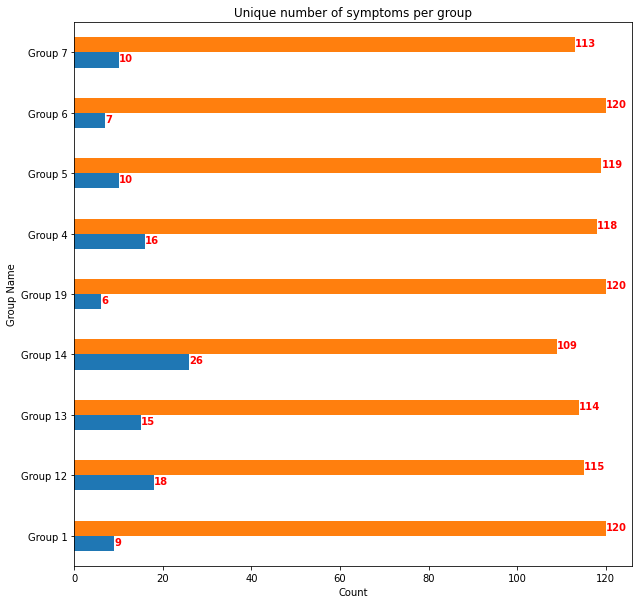

In [220]:
import matplotlib.pyplot as plt
import pandas as pd
   
unique = [9, 18, 15, 26, 6, 16, 10, 7, 10]
total = [len(g1), len(g12), len(g13), len(g14), len(g19), len(g4), len(g5), len(g6), len(g7)]

names = ['Group 1','Group 12','Group 13','Group 14','Group 19','Group 4','Group 5','Group 6','Group 7']


data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)

df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per group')
plt.ylabel('Group Name')
plt.xlabel('Count')

for i, v in enumerate(total):
  plt.text(v, i + .1, str(v), color='red', fontweight='bold')

for i, v in enumerate(unique):
  plt.text(v, i - .15, str(v), color='red', fontweight='bold')

plt.show()

# Global - Disease Wise Unique Symptoms

In [ ]:
unique_count = {}
total_count = {}
for i in final_dict.keys():
  unique_count[i] = 0
  total_count[i] = 0

In [ ]:
disease_symptom = {}

for i in final_dict.keys():
  disease_symptom[i] = set(final_dict[i].keys())

In [ ]:
diseases = list(final_dict.keys())

for i in range(0, len(diseases)):
  a = disease_symptom[diseases[i]]
  b = set()
  total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(disease_symptom[diseases[j]])
  
  unique_count[diseases[i]] = len(a.difference(b))

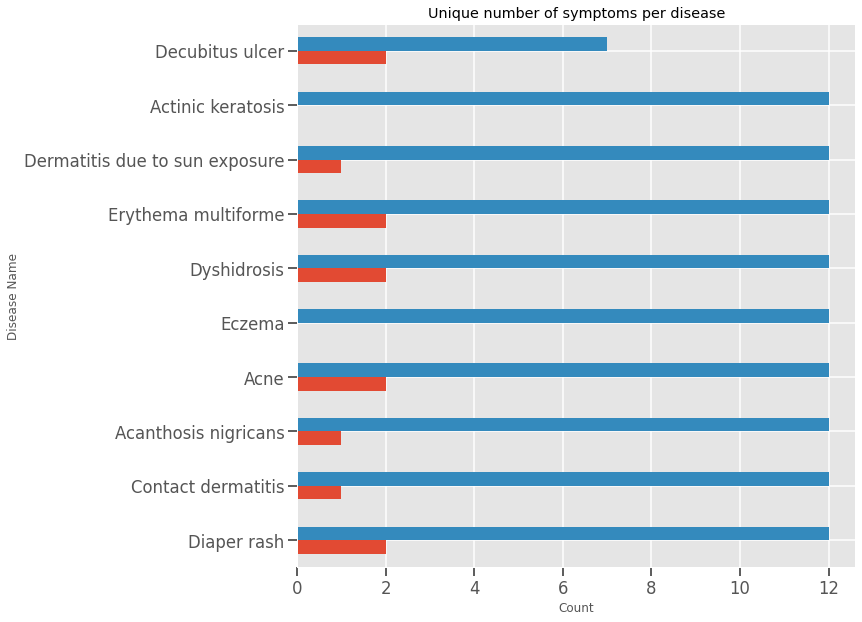

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
   
unique = []
total = []

names = group_12_names_of_diseases
for i in names:
  unique.append(unique_count[i])
  total.append(total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)

#plt.style.use('ggplot')

df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

# Group Wise - Disease Unique Symptoms

In [ ]:
group_1_unique_count = {}
group_1_total_count = {}
for i in group_1_disease_symptoms.keys():
  group_1_unique_count[i] = 0
  group_1_total_count[i] = 0

group_1_disease_unique_symptom = {}

for i in group_1_disease_symptoms.keys():
  group_1_disease_unique_symptom[i] = set(group_1_disease_symptoms[i].keys())

diseases = list(group_1_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_1_disease_unique_symptom[diseases[i]]
  b = set()
  group_1_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_1_disease_unique_symptom[diseases[j]])
  group_1_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_1_names_of_diseases
for i in names:
  unique.append(group_1_unique_count[i])
  total.append(group_1_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

In [ ]:
group_12_unique_count = {}
group_12_total_count = {}
for i in group_12_disease_symptoms.keys():
  group_12_unique_count[i] = 0
  group_12_total_count[i] = 0

group_12_disease_unique_symptom = {}

for i in group_12_disease_symptoms.keys():
  group_12_disease_unique_symptom[i] = set(group_12_disease_symptoms[i].keys())

diseases = list(group_12_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_12_disease_unique_symptom[diseases[i]]
  b = set()
  group_12_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_12_disease_unique_symptom[diseases[j]])
  group_12_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_12_names_of_diseases
for i in names:
  unique.append(group_12_unique_count[i])
  total.append(group_12_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

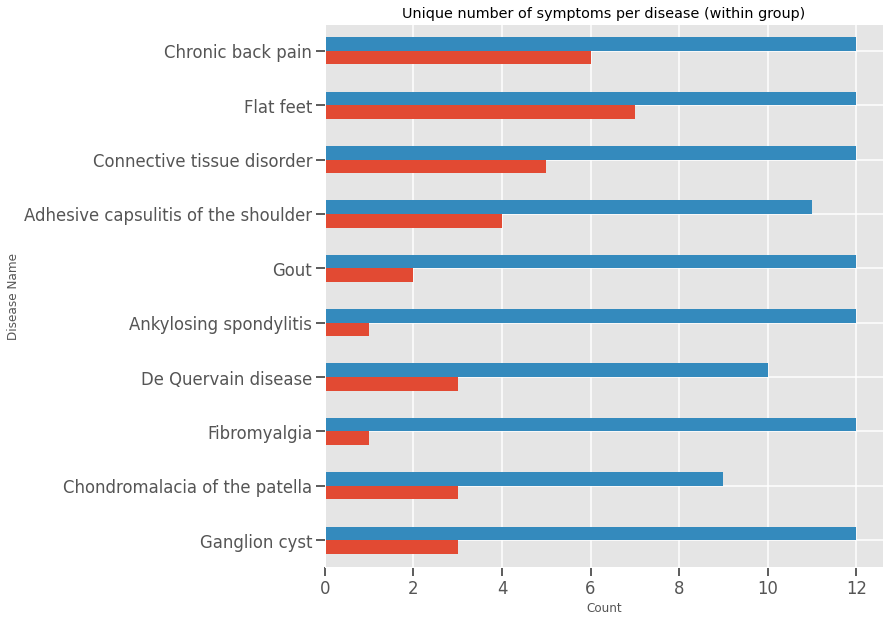

In [ ]:
group_13_unique_count = {}
group_13_total_count = {}
for i in group_13_disease_symptoms.keys():
  group_13_unique_count[i] = 0
  group_13_total_count[i] = 0

group_13_disease_unique_symptom = {}

for i in group_13_disease_symptoms.keys():
  group_13_disease_unique_symptom[i] = set(group_13_disease_symptoms[i].keys())

diseases = list(group_13_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_13_disease_unique_symptom[diseases[i]]
  b = set()
  group_13_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_13_disease_unique_symptom[diseases[j]])
  group_13_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_13_names_of_diseases
for i in names:
  unique.append(group_13_unique_count[i])
  total.append(group_13_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

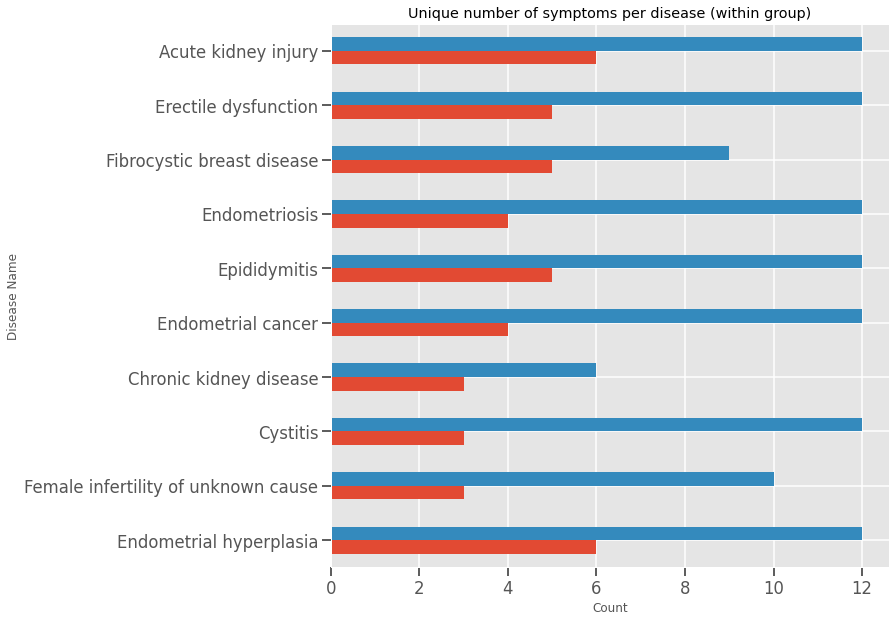

In [ ]:
group_14_unique_count = {}
group_14_total_count = {}
for i in group_14_disease_symptoms.keys():
  group_14_unique_count[i] = 0
  group_14_total_count[i] = 0

group_14_disease_unique_symptom = {}

for i in group_14_disease_symptoms.keys():
  group_14_disease_unique_symptom[i] = set(group_14_disease_symptoms[i].keys())

diseases = list(group_14_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_14_disease_unique_symptom[diseases[i]]
  b = set()
  group_14_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_14_disease_unique_symptom[diseases[j]])
  group_14_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_14_names_of_diseases
for i in names:
  unique.append(group_14_unique_count[i])
  total.append(group_14_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

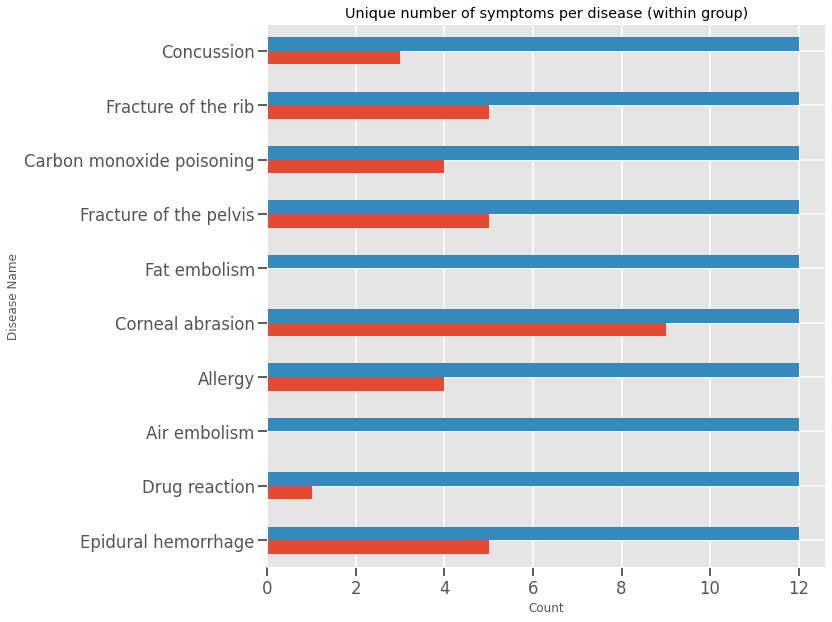

In [ ]:
group_19_unique_count = {}
group_19_total_count = {}
for i in group_19_disease_symptoms.keys():
  group_19_unique_count[i] = 0
  group_19_total_count[i] = 0

group_19_disease_unique_symptom = {}

for i in group_19_disease_symptoms.keys():
  group_19_disease_unique_symptom[i] = set(group_19_disease_symptoms[i].keys())

diseases = list(group_19_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_19_disease_unique_symptom[diseases[i]]
  b = set()
  group_19_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_19_disease_unique_symptom[diseases[j]])
  group_19_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_19_names_of_diseases
for i in names:
  unique.append(group_19_unique_count[i])
  total.append(group_19_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

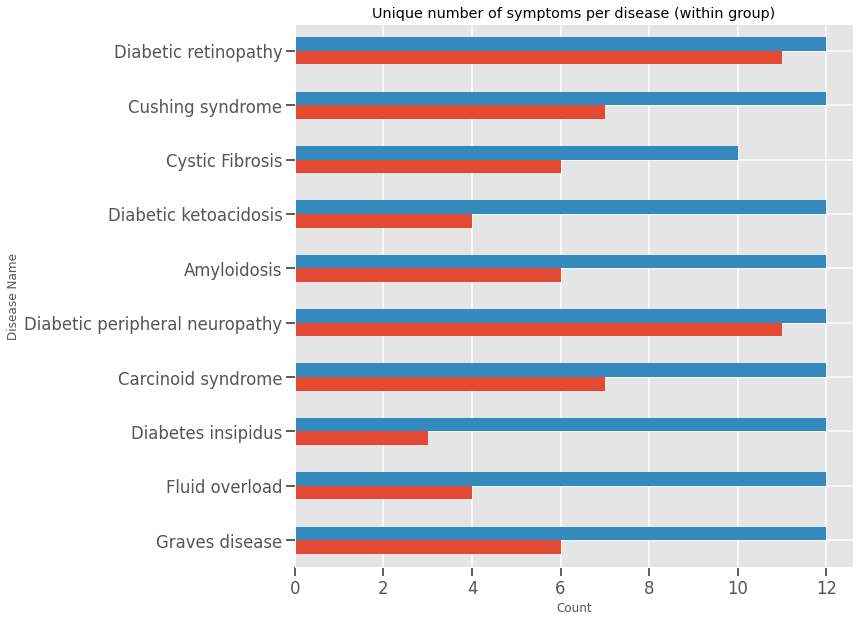

In [ ]:
group_4_unique_count = {}
group_4_total_count = {}
for i in group_4_disease_symptoms.keys():
  group_4_unique_count[i] = 0
  group_4_total_count[i] = 0

group_4_disease_unique_symptom = {}

for i in group_4_disease_symptoms.keys():
  group_4_disease_unique_symptom[i] = set(group_4_disease_symptoms[i].keys())

diseases = list(group_4_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_4_disease_unique_symptom[diseases[i]]
  b = set()
  group_4_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_4_disease_unique_symptom[diseases[j]])
  group_4_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_4_names_of_diseases
for i in names:
  unique.append(group_4_unique_count[i])
  total.append(group_4_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

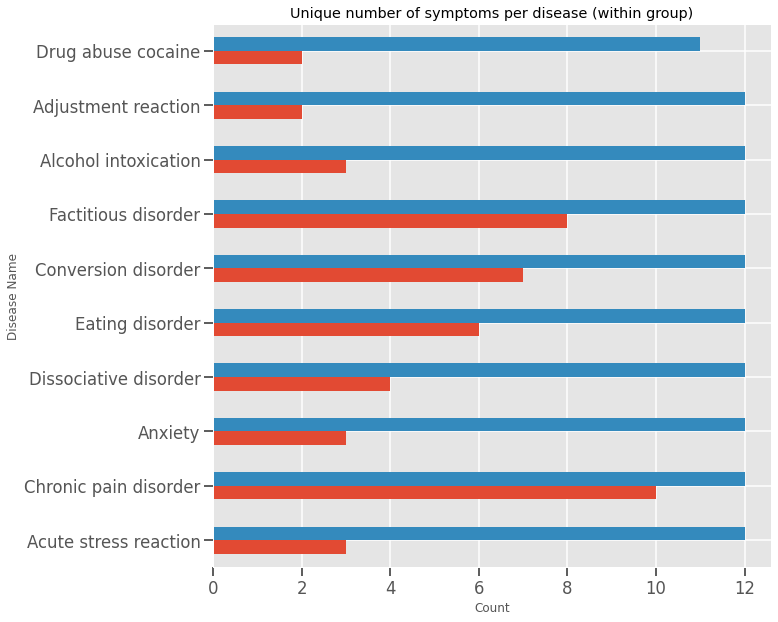

In [ ]:
group_5_unique_count = {}
group_5_total_count = {}
for i in group_5_disease_symptoms.keys():
  group_5_unique_count[i] = 0
  group_5_total_count[i] = 0

group_5_disease_unique_symptom = {}

for i in group_5_disease_symptoms.keys():
  group_5_disease_unique_symptom[i] = set(group_5_disease_symptoms[i].keys())

diseases = list(group_5_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_5_disease_unique_symptom[diseases[i]]
  b = set()
  group_5_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_5_disease_unique_symptom[diseases[j]])
  group_5_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_5_names_of_diseases
for i in names:
  unique.append(group_5_unique_count[i])
  total.append(group_5_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

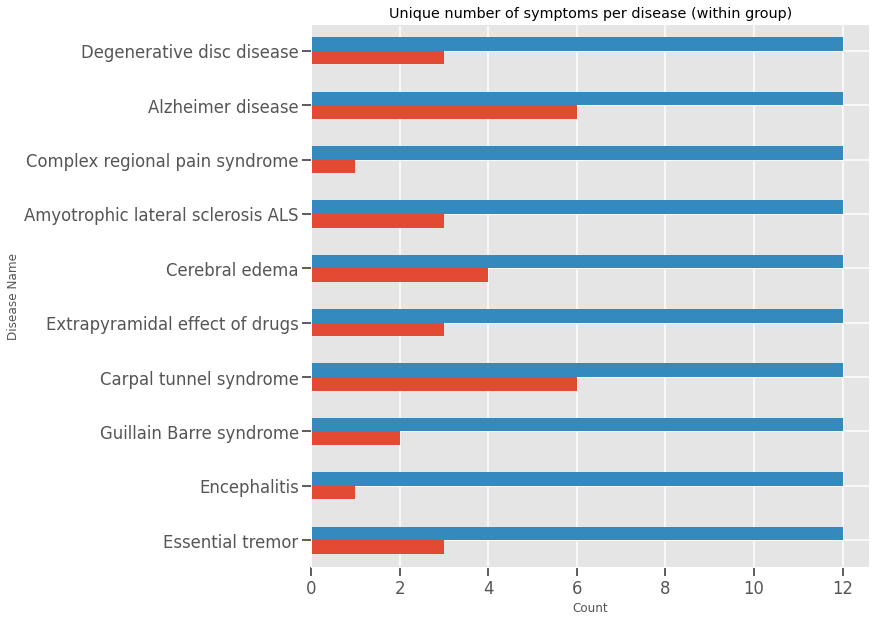

In [ ]:
group_6_unique_count = {}
group_6_total_count = {}
for i in group_6_disease_symptoms.keys():
  group_6_unique_count[i] = 0
  group_6_total_count[i] = 0

group_6_disease_unique_symptom = {}

for i in group_6_disease_symptoms.keys():
  group_6_disease_unique_symptom[i] = set(group_6_disease_symptoms[i].keys())

diseases = list(group_6_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_6_disease_unique_symptom[diseases[i]]
  b = set()
  group_6_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_6_disease_unique_symptom[diseases[j]])
  group_6_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_6_names_of_diseases
for i in names:
  unique.append(group_6_unique_count[i])
  total.append(group_6_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

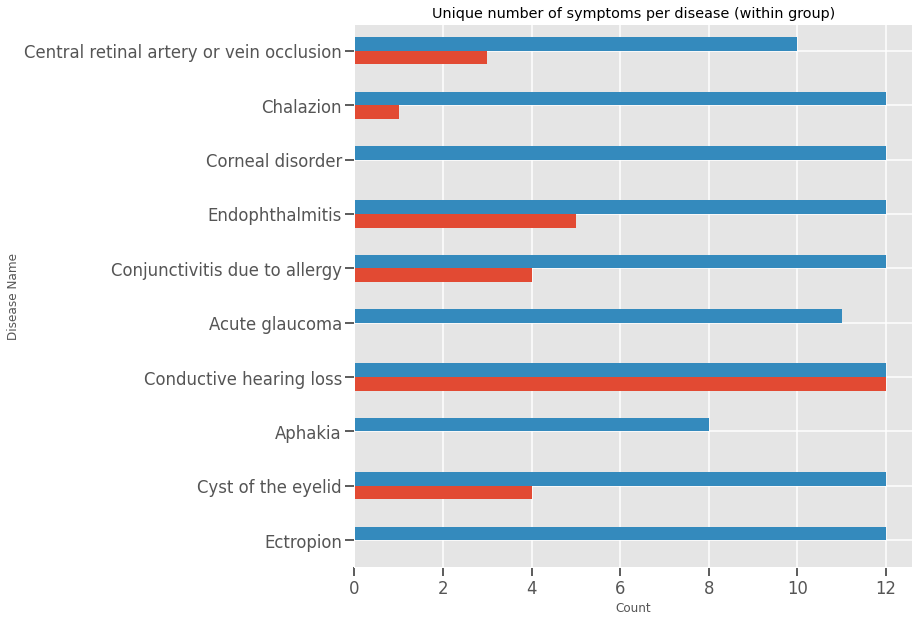

In [ ]:
group_7_unique_count = {}
group_7_total_count = {}
for i in group_7_disease_symptoms.keys():
  group_7_unique_count[i] = 0
  group_7_total_count[i] = 0

group_7_disease_unique_symptom = {}

for i in group_7_disease_symptoms.keys():
  group_7_disease_unique_symptom[i] = set(group_7_disease_symptoms[i].keys())

diseases = list(group_7_disease_symptoms.keys())

for i in range(0, len(diseases)):
  a = group_7_disease_unique_symptom[diseases[i]]
  b = set()
  group_7_total_count[diseases[i]] = len(a)

  for j in range(0, len(diseases)):
    if i == j:
      continue
    b = b.union(group_7_disease_unique_symptom[diseases[j]])
  group_7_unique_count[diseases[i]] = len(a.difference(b))

unique = []
total = []
names = group_7_names_of_diseases
for i in names:
  unique.append(group_7_unique_count[i])
  total.append(group_7_total_count[i])

data = {'Unique' : unique, 'Total': total}
df = pd.DataFrame(data,columns=['Unique', 'Total'], index = names)


df.plot.barh(figsize=(10, 10), legend=None)

plt.title('Unique number of symptoms per disease (within group)')
plt.ylabel('Disease Name')
plt.xlabel('Count')
plt.show()

# Symptom - Disease Count

In [221]:
symptom_names = []
for i in final_dict.values():
  symptom_names.extend(list(i))
symptom_names = set(symptom_names)

In [222]:
len(symptom_names)

266

In [223]:
symptom_disease_dict = {}
for i in symptom_names:
  symptom_disease_dict[i] = {}

for i, j in final_dict.items():
  for k, l in j.items():
    symptom_disease_dict[k][i] = l

In [235]:
# Storing the result into a pickle file
filename = 'symptom_wise_disease_count'
outfile = open(filename, 'wb')
pickle.dump(symptom_disease_dict, outfile)
outfile.close()